### Problem definition
To carry out Exploratory data analysis on the Nigerian economy hence creating insight through the data

### Data Sources
Data Sources
The original data source is from kaggle https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data



### Definition of Terms
* Country: The name of the country.
* Year :The year of the observation.
* Systematic Crisis: "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.
* exch_usd: The exchange rate of the country vis-a-vis the USD.
* domestic_debt_in_default:"0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt.
* sovereign_external_debt_default:"0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt.
* gdp_weighted_default:The total debt in default vis-a-vis the GDP.
* inflation_annual_cpi:The annual CPI(consumer Price Index) Inflation rate.
* Gained_independence:"Yes" means " independence" and "No" means no "independence".
* currency_crises inflation_crises:"0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year.
* banking_crisis:"no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year.
* LCU: local currency units relative to the U.S. dollar

In [45]:
#Importing Data analysis and visualisation Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
crisis = pd.read_csv('african_crises.csv')
crisis = crisis[crisis['country'] == 'Nigeria']
crisis = crisis[crisis['year'] >=1960]
crisis.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
654,45,NGA,Nigeria,1960,0,0.0,0,0,0.0,4.325728,1,0,0,no_crisis
655,45,NGA,Nigeria,1961,0,0.0,0,0,0.0,6.217387,1,0,0,no_crisis
656,45,NGA,Nigeria,1962,0,0.0,0,0,0.0,2.911603,1,0,0,no_crisis
657,45,NGA,Nigeria,1963,0,0.0,0,0,0.0,-1.028492,1,0,0,no_crisis
658,45,NGA,Nigeria,1964,0,0.0,0,0,0.0,0.938031,1,0,0,no_crisis


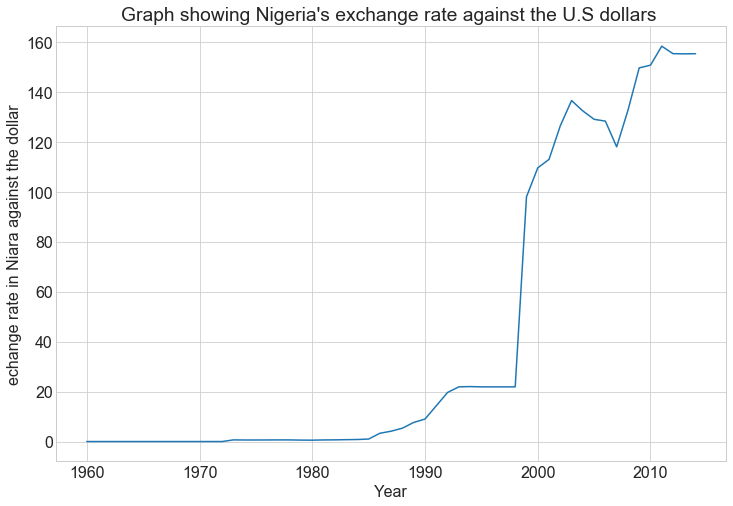

In [4]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16


plt.figure(figsize=(12, 8))
sns.lineplot(x= 'year'  , y ='exch_usd', data = crisis)
plt.title('Graph showing Nigeria\'s exchange rate against the U.S dollars ')
plt.xlabel('Year')
plt.ylabel('echange rate in Niara against the dollar')
plt.show()

### Findings
The value for Official exchange rate (LCU per US$, period average) in Nigeria was 155.25 as of 2014. As the graph Above shows, over the past 54 years this indicator reached a maximum value of 155.25 in 2014 and a minimum value of 0.54 in 1980

The oil crisis in 1998 took major players in the oil industry by a huge surprise, with price going as low as $20 per barrel with country like Nigeria being hit hard

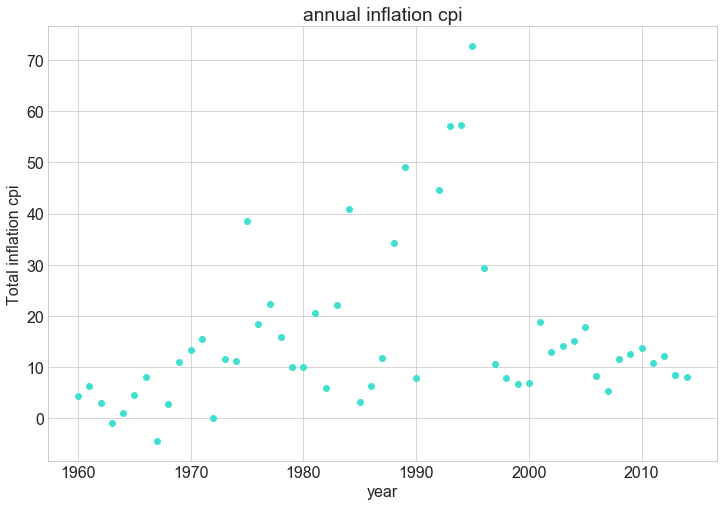

In [28]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(crisis['year'], crisis['inflation_annual_cpi'], c= 'turquoise');
ax.set(xlabel = 'year',
ylabel = 'Total inflation cpi',
title = 'annual inflation cpi');

In [29]:
#Creating a list of annual inflation CPI

inflation = [4.325728, 6.217387, 2.911603, -1.028492, 0.938031, 4.601492, 8.140460, -4.553047, 2.733415, 11.003204,
             13.413472, 15.478424, -0.008248, 11.673469, 11.259437 , 38.503911 , 18.336434, 22.355106, 15.781331, 
             10.068224, 9.970000 , 20.555000 , 5.882000, 22.222000, 40.909000, 3.226000, 6.250000, 11.765000, 34.211000, 
             49.020000, 7.895000, 44.565000, 57.143000, 57.416000, 72.729000, 29.292000 , 10.673000, 7.862000,6.618000,
             6.938000, 18.869000, 12.883000, 14.033000, 15.001000, 17.856000,8.218000,5.413000, 11.581000, 12.543000,
             13.720000, 10.841000, 12.225000, 8.495000,8.048000]

# Defining a function to calculate the change in inflation
def annual_inflation_percent(value):
    changes = [0]
    try:
        for i in range(1,len(value)):
            changes.append((value[i] - value[i-1]))
            value.append(changes)
    except ZeroDivisionError:
        changes.append(0)
    return changes
#Assigning the function to a variable
new = annual_inflation_percent(inflation)

#Creating a change of inflation column in our pandas dataFrame
crisis['%Change in inflation'] = new
#Creating decrease in inflation Variable
Decrease_Inflation = crisis[crisis['%Change in inflation']<=0]
#Creating an increase in inflation variable
Increase_Inflation = crisis[crisis['%Change in inflation']>=0]

In [47]:
#Plotting a graph to show various inflation indexes
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=crisis['year'],
        y=crisis['inflation_annual_cpi'],
        name='Inflation rate(%) CPI'
    ))

fig.add_trace(go.Bar(x=Decrease_Inflation['year'], y=Decrease_Inflation['%Change in inflation'],
                marker_color='red',
                name='Decrease in Inflation'))

fig.add_trace(go.Bar(x=Increase_Inflation['year'], y=Increase_Inflation['%Change in inflation'],
                marker_color='green',
                name='Increase in inflation'
                ))

fig.show(renderers='svg')



Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly.

#### findings from the Visualization.
* Nigeria inflation rate for 2014 was 08.048%, a 0.447% decline from 2013.
* Nigeria inflation rate for 2013 was 08.495%, a 3.73% decline from 2012.
* Nigeria inflation rate for 2012 was 12.225%, a 1.384% increase from 2011.
* Nigeria inflation rate for 2011 was 10.841%, a 2.89% increase from 2010.


### 5. Conclusion
The Nigerian naira has always staggered in relation with the U.S Dollars, However some of it worst fall can be assocaited with economy crisis in Nigeria notably during 1993 - 1998 Given that oil prices were below $20 a barrel in this period, The naira however continued in its decline into 2000's, In addition to low oil prices, Nigeria was also struggling to service its external debts which resulted in Nigeria defaulting payment around 2004 and 2005.

Starting in late 2003, oil prices began to rise steadily from around 30 dollars per barrel till they peaked at 140 dollars per barrel which led to the naira gain subsequently against the Dollar.

Finally Nigeria is faced with yet another crude oil prices due to oil demands resulting from the Covid 19 pandemic and the Nigerian Economy has not fared well in the past with low crude oil prices which forms its major export